In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Regression Task

In [4]:
data= pd.read_csv('./Data/kc_house_data.csv')

In [5]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
data.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [17]:
data.corr().transpose()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Figure size 864x576 with 0 Axes>

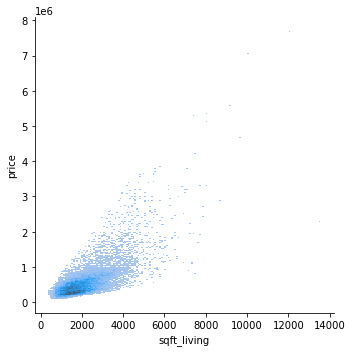

In [23]:
plt.figure(figsize=(12, 8))
sns.displot(x='sqft_living',y='price', data=data)

<AxesSubplot:xlabel='long', ylabel='lat'>

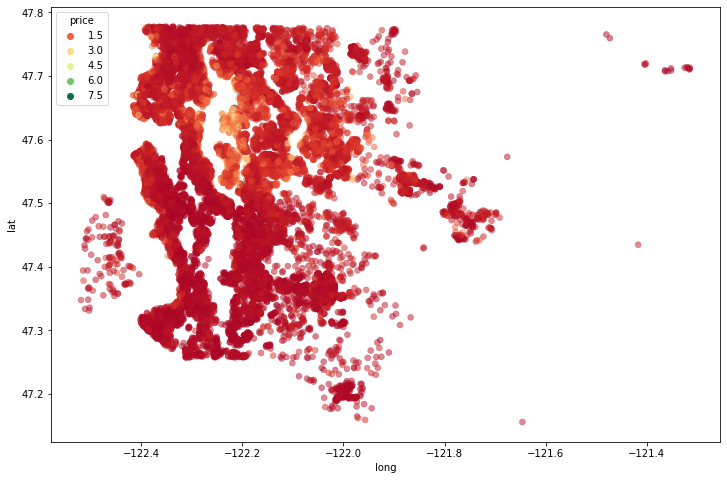

In [31]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=data, hue='price', alpha=0.5, palette='RdYlGn',edgecolor=None)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

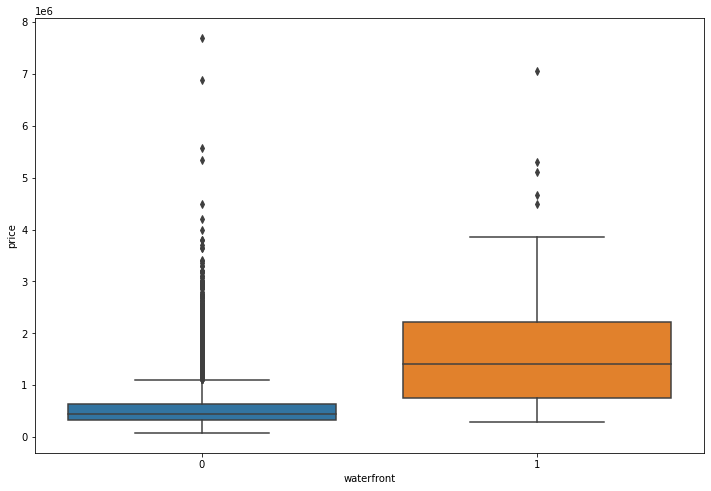

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='waterfront',y='price',data=data)

In [35]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
data.drop(['id', 'zipcode'], axis=1, inplace=True)

In [39]:
data['date'] = pd.to_datetime(data['price'])

In [42]:
data['year'] = data['date'].apply(lambda date :date.year)

In [43]:
data['month'] = data['date'].apply(lambda date :date.month)

In [46]:
data.drop(['date'], axis=1, inplace=True)

In [57]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,1970,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,1970,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,1970,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,1970,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,1970,1


In [59]:
X = data.drop('price', axis=1).values
y = data.price.values

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train.shape

(15117, 19)

In [70]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [76]:
model.fit(x= X_train, y=y_train, batch_size=256, validation_data=(X_test, y_test), epochs=1000)

Epoch 1/1000
60/60 [==============================] - 0s 5ms/step - loss: 29811574784.0000 - val_loss: 27402452992.0000
Epoch 2/1000
60/60 [==============================] - 0s 4ms/step - loss: 29825558528.0000 - val_loss: 27339098112.0000
Epoch 3/1000
60/60 [==============================] - 0s 4ms/step - loss: 29805506560.0000 - val_loss: 27340537856.0000
Epoch 4/1000
60/60 [==============================] - 0s 4ms/step - loss: 29797873664.0000 - val_loss: 27380449280.0000
Epoch 5/1000
60/60 [==============================] - 0s 6ms/step - loss: 29855207424.0000 - val_loss: 27379898368.0000
Epoch 6/1000
60/60 [==============================] - 0s 5ms/step - loss: 29784344576.0000 - val_loss: 27305236480.0000
Epoch 7/1000
60/60 [==============================] - 0s 4ms/step - loss: 29828478976.0000 - val_loss: 27288408064.0000
Epoch 8/1000
60/60 [==============================] - 0s 5ms/step - loss: 29829769216.0000 - val_loss: 27263008768.0000
Epoch 9/1000
60/60 [====================

In [77]:
loss_df = pd.DataFrame(model.history.history)

In [78]:
loss_df.tail()

,loss,val_loss
995,2.667987e+10,2.403132e+10
996,2.670557e+10,2.402182e+10
997,2.670905e+10,2.401688e+10
998,2.669404e+10,2.401531e+10
999,2.670661e+10,2.402407e+10


In [79]:
prediction = model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [81]:
prediction.shape

(6480, 1)

In [86]:
pdf = pd.DataFrame(y_test.reshape(-1,1), columns=['Actual'])

In [87]:
pdf['predicted'] = prediction

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
np.sqrt(mean_squared_error(y_test, prediction))

154997.00442876556

In [92]:
mean_absolute_error(y_test, prediction)

95998.68777006173

In [93]:
single_house = data.drop('price', axis=1).iloc[0]

In [102]:
sh = scaler.transform(single_house.values.reshape(-1,19))

In [103]:
model.predict(sh)

1/1 [==============================] - 0s 60ms/step


array([[255024.36]], dtype=float32)

In [104]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,1970,1


## Classification Task

In [109]:
data = pd.read_csv('./Data/cancer_classification.csv')
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<AxesSubplot:>

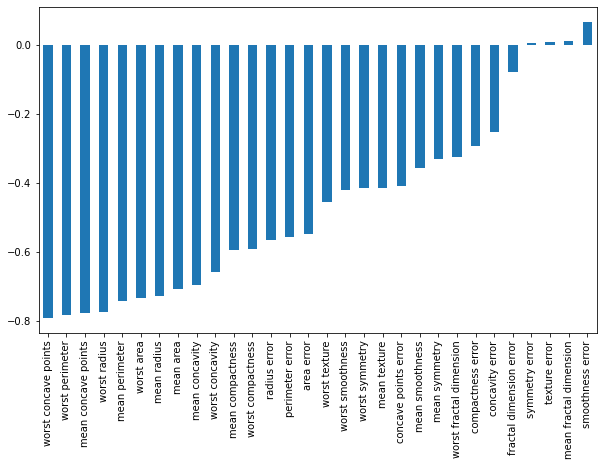

In [118]:
plt.figure(figsize=(10, 6))
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

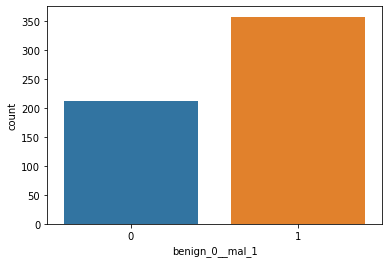

In [119]:
sns.countplot(x='benign_0__mal_1', data=data)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [121]:
X = data.drop('benign_0__mal_1', axis=1).values
y = data.benign_0__mal_1.values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [126]:
scaler = MinMaxScaler()

In [127]:
X_train = scaler.fit_transform(X_train)

In [128]:
X_test = scaler.transform(X_test)

In [129]:
X_train.shape

(455, 30)

In [130]:
X_test.shape

(114, 30)

In [132]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [133]:
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600, verbose=0)

<AxesSubplot:>

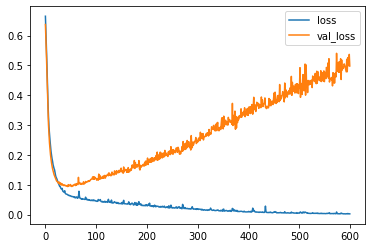

In [134]:
## overfitting
pd.DataFrame(model.history.history).plot()

In [135]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [137]:
earlystop = EarlyStopping(monitor='val_loss',
    patience=20,
    verbose=1,
    mode='min',)

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [138]:
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600, verbose=0, callbacks=[earlystop])

Epoch 30: early stopping


<AxesSubplot:>

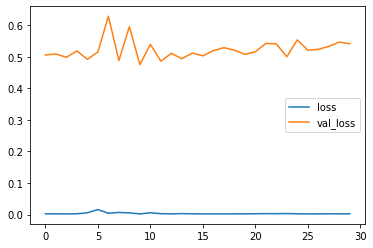

In [139]:
pd.DataFrame(model.history.history).plot()

In [140]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

In [141]:
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=600, verbose=0, callbacks=[earlystop])

Epoch 105: early stopping


<AxesSubplot:>

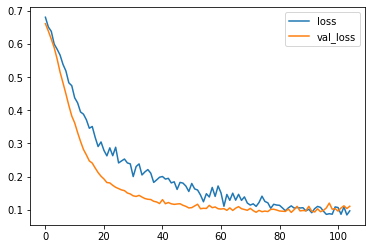

In [142]:
pd.DataFrame(model.history.history).plot()

In [148]:
pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 [==============================] - 0s 2ms/step


In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [154]:
 print(confusion_matrix(y_test, pred))

[[41  1]
 [ 3 69]]
